### Geovisualization with PySAL

#### PySAL Map Classifiers

In [7]:
# !pip install mapclassify
# !pip install contextily

In [8]:
import mapclassify
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [11]:
shp_link = 'data/scipy/scag_region.gpkg'
gdf = gpd.read_file(shp_link)

In [16]:
gdf.head()

,geoid,n_asian_under_15,n_black_under_15,n_hispanic_under_15,n_native_under_15,n_white_under_15,n_persons_under_18,n_asian_over_60,n_black_over_60,n_hispanic_over_60,...,year,n_total_housing_units_sample,p_nonhisp_white_persons,p_white_over_60,p_black_over_60,p_hispanic_over_60,p_native_over_60,p_asian_over_60,p_disabled,geometry
0,06037128702,58.0,0.0,223.0,0.0,475.0,986.0,None,None,None,...,2010,2903.0,64.726214,None,None,None,None,None,None,"POLYGON ((-13185648.969 4050959.563, -13184676..."
1,06037131600,83.0,62.0,777.0,0.0,135.0,1355.0,None,None,None,...,2010,1487.0,28.679979,None,None,None,None,None,None,"POLYGON ((-13198294.195 4058425.605, -13197807..."
2,06037134104,287.0,17.0,816.0,0.0,61.0,1323.0,None,None,None,...,2010,1388.0,14.846188,None,None,None,None,None,None,"POLYGON ((-13200238.613 4057785.343, -13199752..."
3,06037134304,90.0,24.0,298.0,0.0,89.0,520.0,None,None,None,...,2010,928.0,33.378933,None,None,None,None,None,None,"POLYGON ((-13204130.008 4058317.097, -13203648..."
4,06037242000,0.0,229.0,681.0,0.0,0.0,1164.0,None,None,None,...,2010,1054.0,0.058565,None,None,None,None,None,None,"POLYGON ((-13163992.987 4020589.600, -13163989..."


In [18]:
columns = gdf.columns.to_list()

In [19]:
columns

['geoid',
 'n_asian_under_15',
 'n_black_under_15',
 'n_hispanic_under_15',
 'n_native_under_15',
 'n_white_under_15',
 'n_persons_under_18',
 'n_asian_over_60',
 'n_black_over_60',
 'n_hispanic_over_60',
 'n_native_over_60',
 'n_persons_over_60',
 'n_white_over_60',
 'n_asian_over_65',
 'n_black_over_65',
 'n_hispanic_over_65',
 'n_native_over_65',
 'n_white_over_65',
 'n_persons_over_75',
 'n_persons_over_15',
 'n_civilians_over_16',
 'n_civilians_over_18',
 'n_persons_over_25',
 'n_age_5_older',
 'n_asian_age_distribution',
 'n_black_age_distribution',
 'n_hispanic_age_distribution',
 'n_native_age_distribution',
 'n_white_age_distribution',
 'n_asian_persons',
 'n_black_persons',
 'n_chinese_persons',
 'n_labor_force',
 'n_civilians_16_64',
 'n_edu_college_greater',
 'n_cuban_pop',
 'n_poverty_determined_asian',
 'n_poverty_determined_black',
 'n_total_pop_sample',
 'n_female_over_16',
 'n_poverty_determined_families',
 'n_poverty_determined_hispanic',
 'n_disabled',
 'n_housing_un

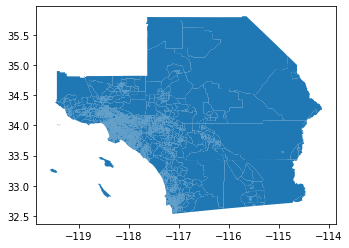

In [12]:
gdf.plot()

In [13]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

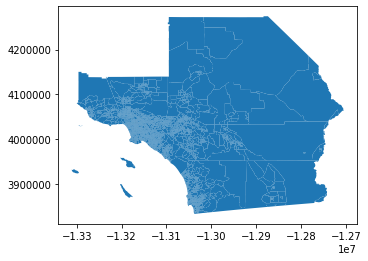

In [14]:
gdf = gdf.to_crs(3857)
gdf.plot()

In [15]:
gdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

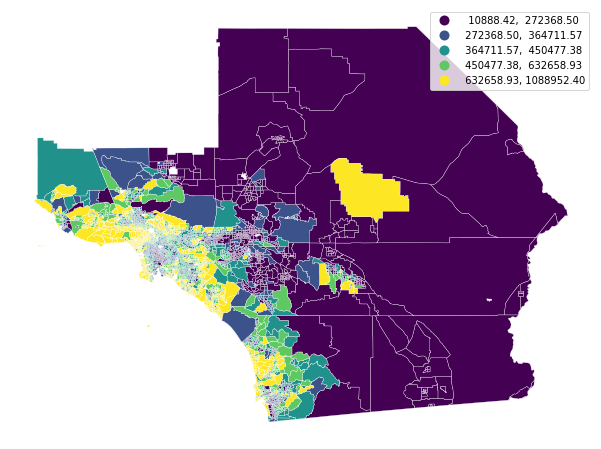

In [25]:
f, ax = plt.subplots(1, figsize=(12, 8))
gdf.plot(ax=ax, column='median_home_value', scheme='QUANTILES',
         edgecolor='white', legend=True, linewidth=0.3)
ax.set_axis_off()
plt.show()

In [26]:
gdf.fillna(gdf.mean(), inplace=True)

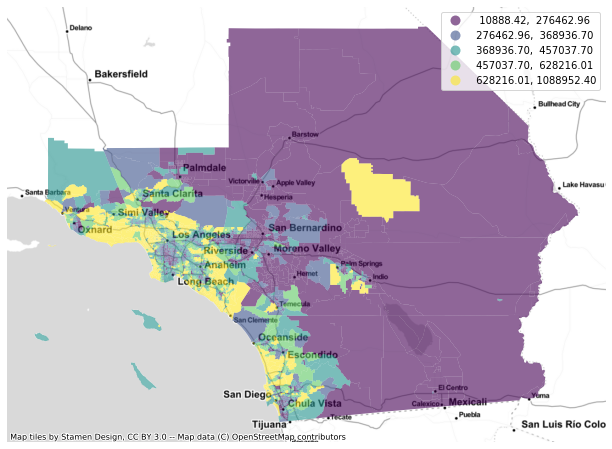

In [31]:
f, ax = plt.subplots(1, figsize=(12, 8))
gdf.plot(ax=ax, column='median_home_value', scheme='QUANTILES', alpha=0.6, legend=True)
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()
plt.show()

In [32]:
home_values = gdf['median_home_value']
home_values.head()

0    647272.659176
1    400842.977528
2    416741.666667
3    406178.838951
4    251438.857678
Name: median_home_value, dtype: float64

In [33]:
mapclassify.Quantiles(home_values, k=5)

Quantiles                       

        Interval           Count
--------------------------------
[  10888.42,  276462.96] |   916
( 276462.96,  368936.70] |   917
( 368936.70,  457037.70] |   993
( 457037.70,  628216.01] |   840
( 628216.01, 1088952.40] |   914

In [36]:
q10 = mapclassify.Quantiles(home_values, k=10)
q10

Quantiles                       

        Interval           Count
--------------------------------
[  10888.42,  203688.34] |   458
( 203688.34,  276462.96] |   458
( 276462.96,  325454.88] |   458
( 325454.88,  368936.70] |   459
( 368936.70,  406233.29] |   457
( 406233.29,  457037.70] |   536
( 457037.70,  512928.74] |   380
( 512928.74,  628216.01] |   460
( 628216.01,  778142.83] |   456
( 778142.83, 1088952.40] |   458

In [35]:
dir(q10)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_classify',
 '_fmt',
 '_set_bins',
 '_summary',
 '_table_string',
 '_update',
 'adcm',
 'bins',
 'classes',
 'counts',
 'find_bin',
 'fmt',
 'gadf',
 'get_adcm',
 'get_fmt',
 'get_gadf',
 'get_legend_classes',
 'get_tss',
 'k',
 'make',
 'name',
 'plot',
 'set_fmt',
 'table',
 'tss',
 'update',
 'y',
 'yb']

In [37]:
q10.bins

array([ 203688.34269663,  276462.9588015 ,  325454.87827715,
        368936.70411985,  406233.28651685,  457037.69973266,
        512928.73595506,  628216.01123596,  778142.82771536,
       1088952.39981273])

In [73]:
q10.yb #array of bin ids

array([8, 4, 5, ..., 2, 1, 7])

In [38]:
q10.counts

array([458, 458, 458, 459, 457, 536, 380, 460, 456, 458])

In [39]:
q10.table

<bound method MapClassifier.table of Quantiles                       

        Interval           Count
--------------------------------
[  10888.42,  203688.34] |   458
( 203688.34,  276462.96] |   458
( 276462.96,  325454.88] |   458
( 325454.88,  368936.70] |   459
( 368936.70,  406233.29] |   457
( 406233.29,  457037.70] |   536
( 457037.70,  512928.74] |   380
( 512928.74,  628216.01] |   460
( 628216.01,  778142.83] |   456
( 778142.83, 1088952.40] |   458>

In [41]:
q10.get_legend_classes

<bound method MapClassifier.get_legend_classes of Quantiles                       

        Interval           Count
--------------------------------
[  10888.42,  203688.34] |   458
( 203688.34,  276462.96] |   458
( 276462.96,  325454.88] |   458
( 325454.88,  368936.70] |   459
( 368936.70,  406233.29] |   457
( 406233.29,  457037.70] |   536
( 457037.70,  512928.74] |   380
( 512928.74,  628216.01] |   460
( 628216.01,  778142.83] |   456
( 778142.83, 1088952.40] |   458>

In [42]:
mapclassify.CLASSIFIERS

('BoxPlot',
 'EqualInterval',
 'FisherJenks',
 'FisherJenksSampled',
 'HeadTailBreaks',
 'JenksCaspall',
 'JenksCaspallForced',
 'JenksCaspallSampled',
 'MaxP',
 'MaximumBreaks',
 'NaturalBreaks',
 'Quantiles',
 'Percentiles',
 'StdMean',
 'UserDefined')

In [44]:
fj10 = mapclassify.FisherJenks(home_values, k=10)

In [45]:
fj10

FisherJenks                     

        Interval           Count
--------------------------------
[  10888.42,  191982.12] |   428
( 191982.12,  278662.64] |   510
( 278662.64,  348355.52] |   663
( 348355.52,  417721.72] |   800
( 417721.72,  492314.89] |   679
( 492314.89,  580955.52] |   394
( 580955.52,  680594.57] |   392
( 680594.57,  804626.12] |   297
( 804626.12,  975482.58] |   184
( 975482.58, 1088952.40] |   233

In [46]:
q10.adcm # measure of fit

127632537.27184954

In [47]:
fj10.adcm # less is better

98231639.16239835

In [49]:
bins = [100000, 500000, 1000000, 1500000]
ud4 = mapclassify.UserDefined(home_values, bins=bins)
ud4

UserDefined                     

        Interval           Count
--------------------------------
[  10888.42,  100000.00] |    61
( 100000.00,  500000.00] |  3054
( 500000.00, 1000000.00] |  1251
(1000000.00, 1500000.00] |   214

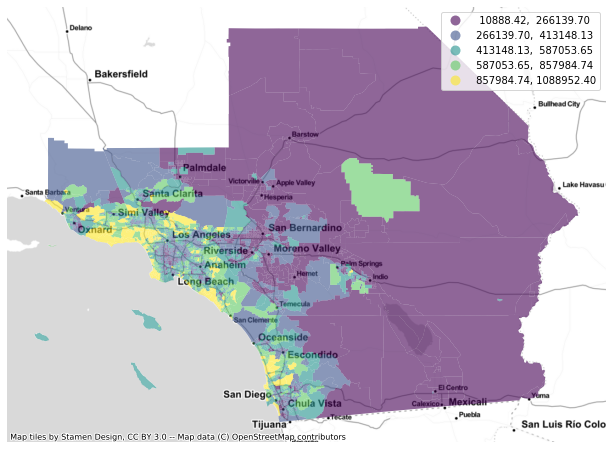

In [50]:
f, ax = plt.subplots(1, figsize=(12, 8))
gdf.plot(ax=ax, column='median_home_value', scheme='FisherJenks', alpha=0.6, legend=True)
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()
plt.show()

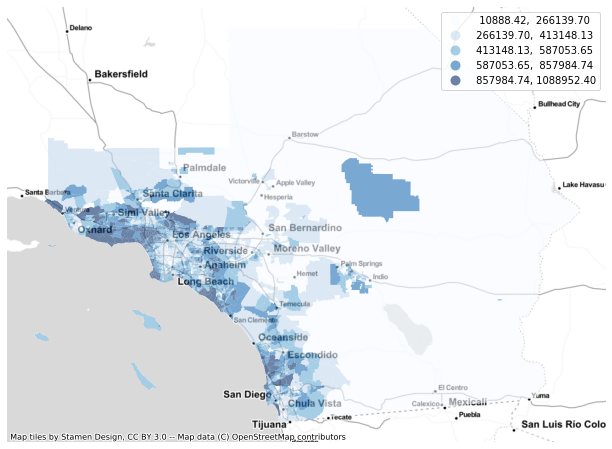

In [51]:
f, ax = plt.subplots(1, figsize=(12, 8))
gdf.plot(ax=ax, column='median_home_value', scheme='FisherJenks', alpha=0.6, legend=True, cmap='Blues')
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()
plt.show()

In [52]:
import numpy

In [59]:
counties = list(set([geoid[:5] for geoid in gdf.geoid]))
counties

['06111', '06071', '06037', '06073', '06065', '06025', '06059']

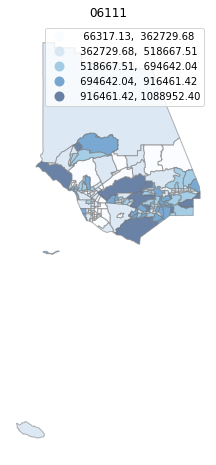

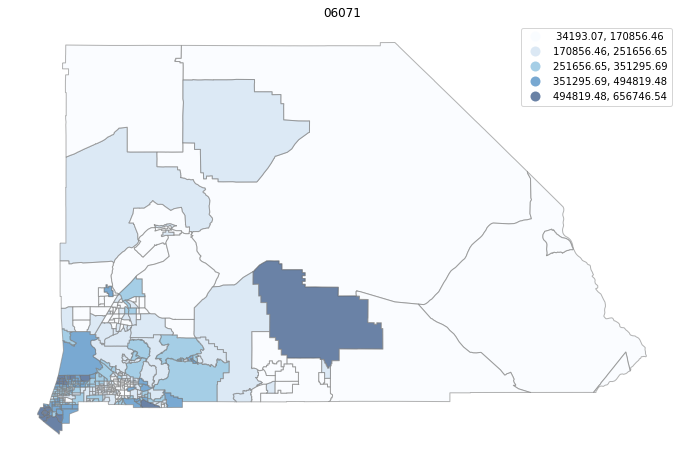

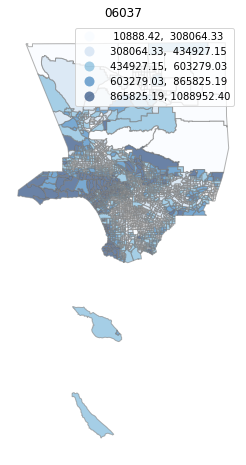

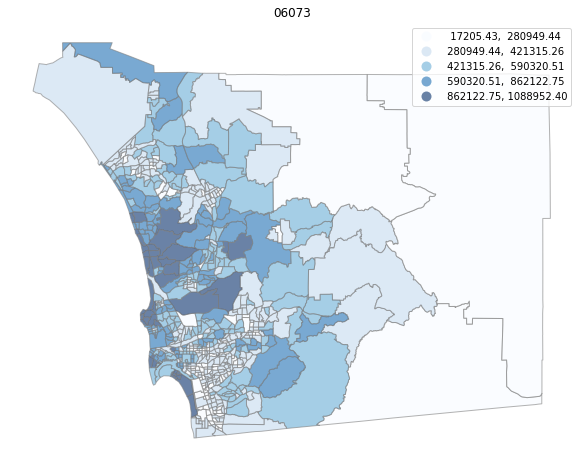

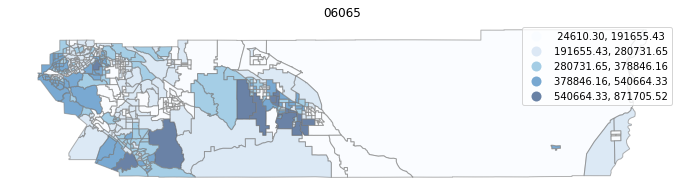

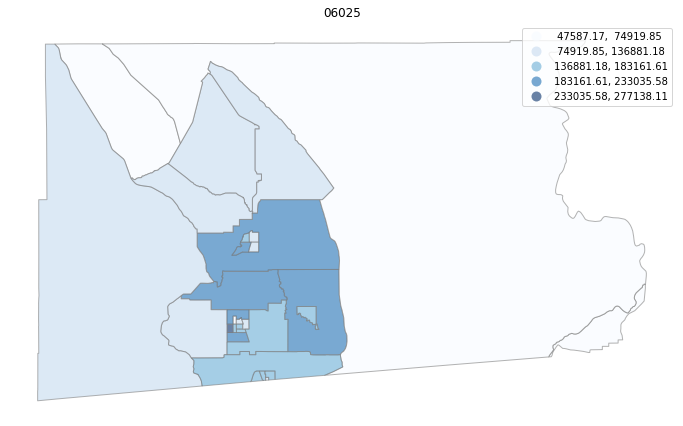

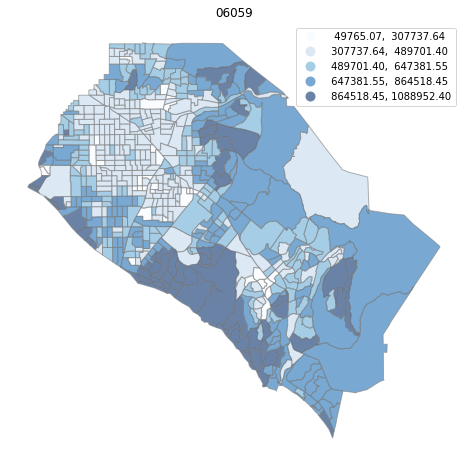

In [60]:
for county in counties:
    cgdf = gdf[gdf['geoid'].str.match(f'^{county}')]
    f, ax = plt.subplots(1, figsize=(12, 8))
    cgdf.plot(column='median_home_value', scheme='FisherJenks', ax=ax,
             edgecolor='grey', legend=True, cmap='Blues', alpha=0.6)
    plt.title(county)
    ax.set_axis_off()
    plt.show()